# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
from scipy import optimize
import sys
sys.path.append('../SEIR_full/')
sys.path.append('..')
import SEIR_full as mdl
import SEIR_full.model_class as mdl
import datetime as dt
from scipy.stats import poisson
from scipy.stats import binom
import copy
import os
import time

In [2]:
with (open('../Data/parameters/indices.pickle', 'rb')) as openfile:
    ind = pickle.load(openfile)

# Parameters from fit

In [3]:
beta_j = {}
theta = {}
beta_behave = {}

In [4]:
# Normal run
Beta=[0.09883986, 0.05334751, 0.05144386, 0.30902021]
Theta=2.074502181457254
Beta_behave=0.2364975456730552

In [5]:
beta_j['norm'] = np.array([Beta[0], Beta[0], Beta[0], 
                   Beta[1], Beta[1], 
                   Beta[2], Beta[2], 
                   Beta[3], Beta[3]])
theta['norm'] = Theta
beta_behave['norm'] = Beta_behave

In [6]:
# UB run
Beta=[0.12501922, 0.07354475, 0.09657314, 0.48909651]
Theta=1.5,
Beta_behave=0.2280608311545828

In [7]:
beta_j['ub'] = np.array([Beta[0], Beta[0], Beta[0], 
                   Beta[1], Beta[1], 
                   Beta[2], Beta[2], 
                   Beta[3], Beta[3]])
theta['ub'] = Theta
beta_behave['ub'] = Beta_behave

In [8]:
# LB run
Beta=[0.04909444, 0.02292042, 0.01912638, 0.1331989 ]
Theta=2.839846134144761
Beta_behave=0.4244872199315455

In [9]:
beta_j['lb'] = np.array([Beta[0], Beta[0], Beta[0], 
                   Beta[1], Beta[1], 
                   Beta[2], Beta[2], 
                   Beta[3], Beta[3]])
theta['lb'] = Theta
beta_behave['lb'] = Beta_behave

# Consts:

In [10]:
scen = 'Scenario2'
start_inter = pd.Timestamp('2020-04-20')
case = 'norm'
beginning = pd.Timestamp('2020-02-20')

# Running first step of model

In [11]:
model = mdl.Model_behave(
    ind,
    beta_j=beta_j[case],
    theta=theta[case],
    beta_behave=beta_behave[case],
    eps=mdl.eps_sector[scen],
    f=mdl.f0_full[scen],
)

res_mdl = model.predict(
    C=mdl.C_calibration,
    days_in_season=(start_inter-beginning).days,
    stay_home_idx=mdl.stay_home_idx,
    not_routine=mdl.not_routine,
)

in time  0  found Nan in C 0
in time  0  found Nan in C 0
in time  0  found Nan in home 0
in time  1  found Nan in C 0
in time  1  found Nan in C 0
in time  1  found Nan in home 0
in time  2  found Nan in C 0
in time  2  found Nan in C 0
in time  2  found Nan in home 0
in time  3  found Nan in C 0
in time  3  found Nan in C 0
in time  3  found Nan in home 0
in time  4  found Nan in C 0
in time  4  found Nan in C 0
in time  4  found Nan in home 0
in time  5  found Nan in C 0
in time  5  found Nan in C 0
in time  5  found Nan in home 0
in time  6  found Nan in C 0
in time  6  found Nan in C 0
in time  6  found Nan in home 0
in time  7  found Nan in C 0
in time  7  found Nan in C 0
in time  7  found Nan in home 0
in time  8  found Nan in C 0
in time  8  found Nan in C 0
in time  8  found Nan in home 0
in time  9  found Nan in C 0
in time  9  found Nan in C 0
in time  9  found Nan in home 0
in time  10  found Nan in C 0
in time  10  found Nan in C 0
in time  10  found Nan in home 0
in time

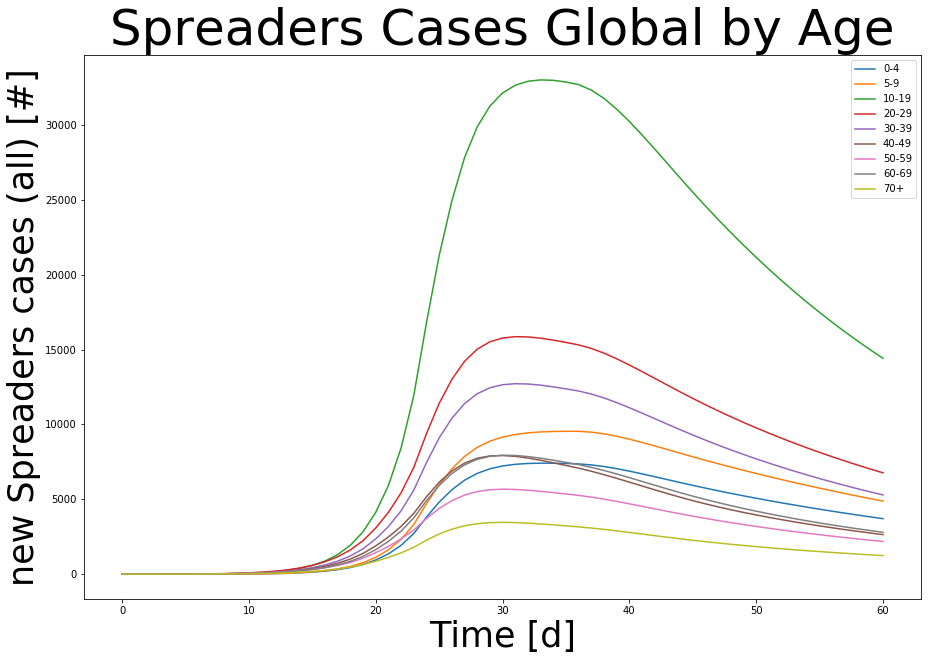

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa96fac8>)

In [13]:
mdl.plot_I_by_age(ind, res_mdl)

In [14]:
res_mdl['new_Is'].sum()

nan

In [15]:
res_mdl['new_Is'][:55].sum(axis=1).sum()*mdl.pop_israel

nan

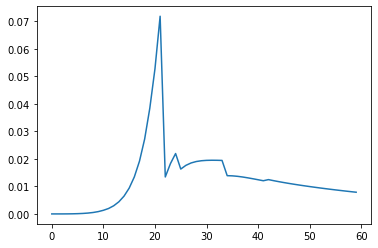

In [14]:
plt.plot((res_mdl['L'].sum(axis=1)))

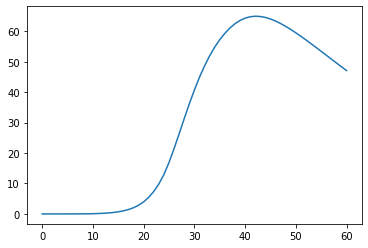

In [15]:
plt.plot(((res_mdl['H']).sum(axis=1))*9136000)

# Performing Intervention

In [16]:
# inter_name = '30_no_old'
# inter_name='30_no_old_kid09'
# inter_name='30_no_old_kid04'
# inter_name='30_no_old_kid04_by2'
# inter_name='30_no_old_kid04_by15'
# inter_name='30_no_old_kid04_by_inf'
# inter_name='30_no_old_kid04_by2_only_row'
# inter_name='30_no_old_kid04_by3'
# inter_name='30_no_old_kid03_by2_inter'
# inter_name='30_no_old_kid0_by2_inter'
# inter_name='30_no_old_inter'
# inter_name='30_no_old_kid04_by2_inter'
# inter_name='30_no_old_kid04_by2_inter'
# inter_name='30_no_old_kid06_inter'
# inter_name='30_kid06_inter'
# inter_name='30_kid09_inter'
# inter_name='50_kid09_inter'
# inter_name='50_risk30_kid05_inter'
# inter_name='50_risk30_kid04_inter'
# inter_name='50_risk30_kid06_inter'
# inter_name='50_risk30_inter'
inter_name = '100_no_risk_inter'  

In [17]:
with open('../Data/interventions/C_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
    C_inter_30_no_old = pickle.load(pickle_in)

with open('../Data/interventions/stay_home_idx_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
    stay_home_idx_inter_30_no_old = pickle.load(pickle_in)

with open('../Data/interventions/routine_t_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
    routine_t_inter_30_no_old = pickle.load(pickle_in)
    
with open('../Data/interventions/transfer_pop_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
    transfer_pop_inter_30_no_old = pickle.load(pickle_in)

In [18]:
model_inter = copy.deepcopy(model)
res_mdl = model_inter.intervention(
    C =C_inter_30_no_old,
    days_in_season=350,
    stay_home_idx=stay_home_idx_inter_30_no_old,
    not_routine=routine_t_inter_30_no_old,
    prop_dict=transfer_pop_inter_30_no_old,
)

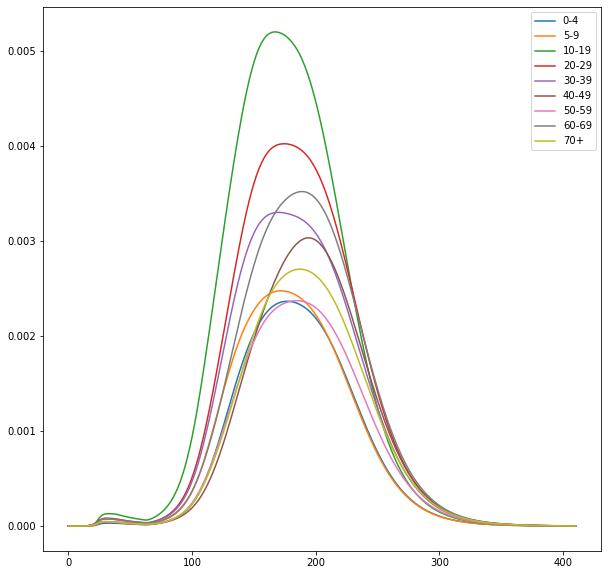

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xab05320>)

In [19]:
mdl.plot_I_by_age(res_mdl)

In [20]:
res_mdl['new_Is'].sum()

0.2415050650598777

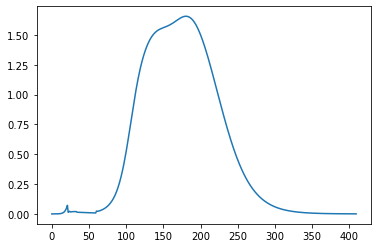

In [21]:
plt.plot((res_mdl['L'].sum(axis=1)))

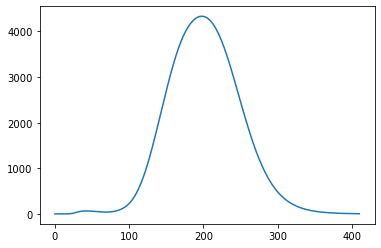

In [22]:
plt.plot(((res_mdl['H']).sum(axis=1))*9136000)

153.33943723608607
431260.65794203395


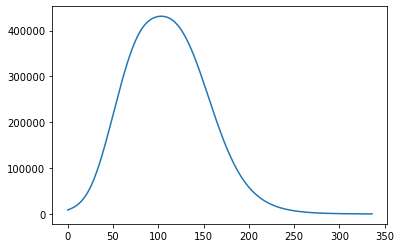

In [23]:
# number of infecting people per day from 14 day from now
tmp = ((res_mdl['Ia']).sum(axis=1)+(res_mdl['Is']).sum(axis=1)+(res_mdl['Ie']).sum(axis=1))*mdl.pop_israel
tmp = tmp[((start_inter-beginning).days+14):]

plt.plot(tmp)
print(tmp.min())
print(tmp.max())

In [24]:
# max number of respiratory cases after 3 months
(((res_mdl['H']).sum(axis=1))*9136000).max()

4332.456546541802

9.81484716460997
47649.31584409482


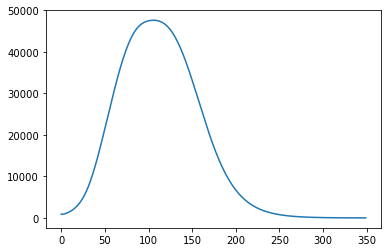

In [25]:
lambda_t = []
for ar in res_mdl['L']:
    lambda_t.append(mdl.expand_partial_array(mdl.region_age_dict, ar))
lambda_t = np.array(lambda_t)
lambda_t = lambda_t
tmp = (res_mdl['S'][1:] * lambda_t).sum(axis=1)*mdl.pop_israel
tmp = tmp[((start_inter-beginning).days):]

plt.plot(tmp)
print(tmp.min())
print(tmp.max())

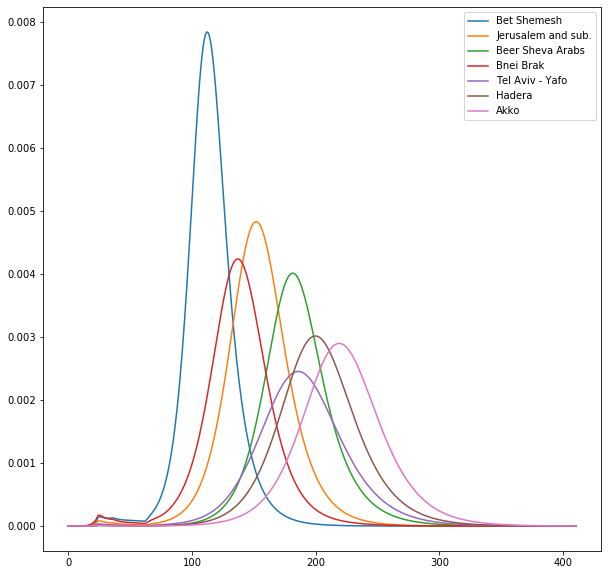

In [26]:
# Creating table 1, by region:
tabel_1_dict = {}
for region in ['11_betshemesh','11','62_arab','51_bb','51','32','24']:
    tabel_1_dict[mdl.cell[region]] = (res_mdl['new_Is'][:, mdl.region_dict[region]].sum(axis=1))/mdl.population_size[mdl.region_dict[region]].sum()
tabel1_df = pd.DataFrame.from_dict(tabel_1_dict)

tabel1_df.iloc[:].plot(figsize=(10,10))

## Creating Graphs:

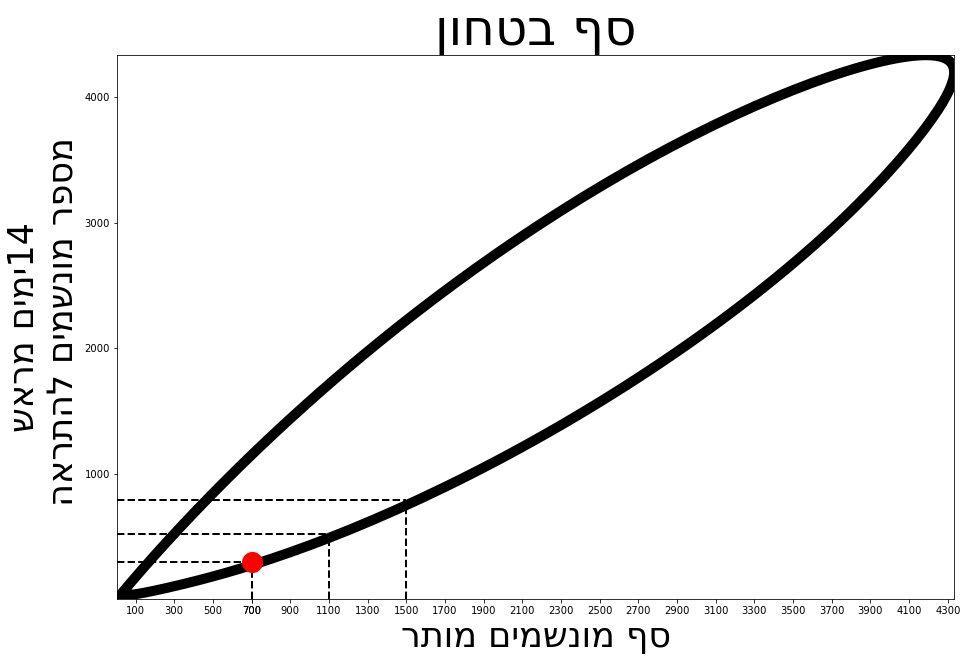

In [27]:
mdl.make_respiratory_warning(res_mdl, (start_inter-beginning).days)

# Checking Confidence Interval with lower than 700

In [39]:
cal_parameters = pd.read_pickle('../Data/calibration/calibrattion_dict.pickle')

In [40]:
cal_parameters

{'80%': {'beta_j': array([0.1157294 , 0.1157294 , 0.1157294 , 0.06716495, 0.06716495,
         0.07727618, 0.07727618, 0.41851232, 0.41851232]),
  'beta_behave': 0.23409992936184507,
  'theta': 1.5},
 '75%': {'beta_j': array([0.11383349, 0.11383349, 0.11383349, 0.06559511, 0.06559511,
         0.07315267, 0.07315267, 0.40333246, 0.40333246]),
  'beta_behave': 0.2348158677677705,
  'theta': 1.5247164304657486},
 '70%': {'beta_j': array([0.1117097 , 0.1117097 , 0.1117097 , 0.06382757, 0.06382757,
         0.06940131, 0.06940131, 0.38820894, 0.38820894]),
  'beta_behave': 0.2355405990831057,
  'theta': 1.56973015443624}}

In [6]:
inter_name='50_risk30_kid06_inter'


scen = 'Scenario2'
start_inter = pd.Timestamp('2020-04-20')
beginning = pd.Timestamp('2020-02-20')


for key in cal_parameters.keys():
    model = mdl.Model_behave(
        beta_j=cal_parameters[key]['beta_j'],
        theta=cal_parameters[key]['theta'],
        beta_behave=cal_parameters[key]['beta_behave'],
        eps=mdl.eps_sector[scen],
        f=mdl.f0_full[scen],
    )

    res_mdl = model.predict(
        C=mdl.C_calibration,
        days_in_season=(start_inter-beginning).days,
        stay_home_idx=mdl.stay_home_idx,
        not_routine=mdl.not_routine,
    )
    
    with open('../Data/interventions/C_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
        C_inter_30_no_old = pickle.load(pickle_in)

    with open('../Data/interventions/stay_home_idx_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
        stay_home_idx_inter_30_no_old = pickle.load(pickle_in)

    with open('../Data/interventions/routine_t_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
        routine_t_inter_30_no_old = pickle.load(pickle_in)

    with open('../Data/interventions/transfer_pop_inter' + inter_name + '.pickle', 'rb') as pickle_in:
        transfer_pop_inter_30_no_old = pickle.load(pickle_in)
        
    model_inter = copy.deepcopy(model)
    res_mdl = model_inter.intervention(
        C =C_inter_30_no_old,
        days_in_season=90,
        stay_home_idx=stay_home_idx_inter_30_no_old,
        not_routine=routine_t_inter_30_no_old,
        prop_dict=transfer_pop_inter_30_no_old,
    )
    
    print('for ', key, 'we got for the end of july the max:')
    print('Respiratoy cases max: ', (((res_mdl['H']).sum(axis=1))*9136000).max())
    

for  80% we got for the end of july the max:
Respiratoy cases max:  671.7831617434392
for  75% we got for the end of july the max:
Respiratoy cases max:  557.353132382237
for  70% we got for the end of july the max:
Respiratoy cases max:  472.03443506773436


# General Code for running enterventions

In [8]:
# interventions to examine:
inter_list = [
    '20@50_no_school_kid010',
#     '20@75_no_school_kid010',
#     '20@100_no_school_kid010',
#     '20@100',
#     '250@50_no_school_kid010',
#     '250@75_no_school_kid010',
#     '250@100_no_school_kid010',
#     '250@100',
    '20@75_haredim1317_half_jerus',
#     '20@75_no_haredim1317_half_jerus'
]

# parameters to examine:
parameters_list = [
#     '70%',
#     '75%',
#     '80%',
    'ub',
    'base',
#     'lb',
]

# inter_name2 = '20@10'
# inter2_timing = 126
dates = [
    pd.Timestamp('2020-04-23'),
    pd.Timestamp('2020-05-01'),
    pd.Timestamp('2020-05-09'),
    pd.Timestamp('2020-05-17'),
    pd.Timestamp('2020-05-25'),
    pd.Timestamp('2020-06-02'),
    pd.Timestamp('2020-06-10'),
    pd.Timestamp('2020-06-18'),
    pd.Timestamp('2020-06-26'),
    pd.Timestamp('2020-07-15'),
    pd.Timestamp('2020-08-01'),
]

# results = {}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


ub  parameters, intervention:  20@50_no_school_kid010  we got:
2020-04-23 00:00:00 Respiratoy cases:  225.9954418046215
2020-05-01 00:00:00 Respiratoy cases:  209.9890134153613
2020-05-09 00:00:00 Respiratoy cases:  198.49853795149727
2020-05-17 00:00:00 Respiratoy cases:  210.4402316224829
2020-05-25 00:00:00 Respiratoy cases:  282.2698536161568
2020-06-02 00:00:00 Respiratoy cases:  446.83055119985056
2020-06-10 00:00:00 Respiratoy cases:  761.4215422087162
2020-06-18 00:00:00 Respiratoy cases:  1320.6520223286745
2020-06-26 00:00:00 Respiratoy cases:  2253.772861337432
2020-07-15 00:00:00 Respiratoy cases:  6666.7719062075275
2020-08-01 00:00:00 Respiratoy cases:  12499.043621123163


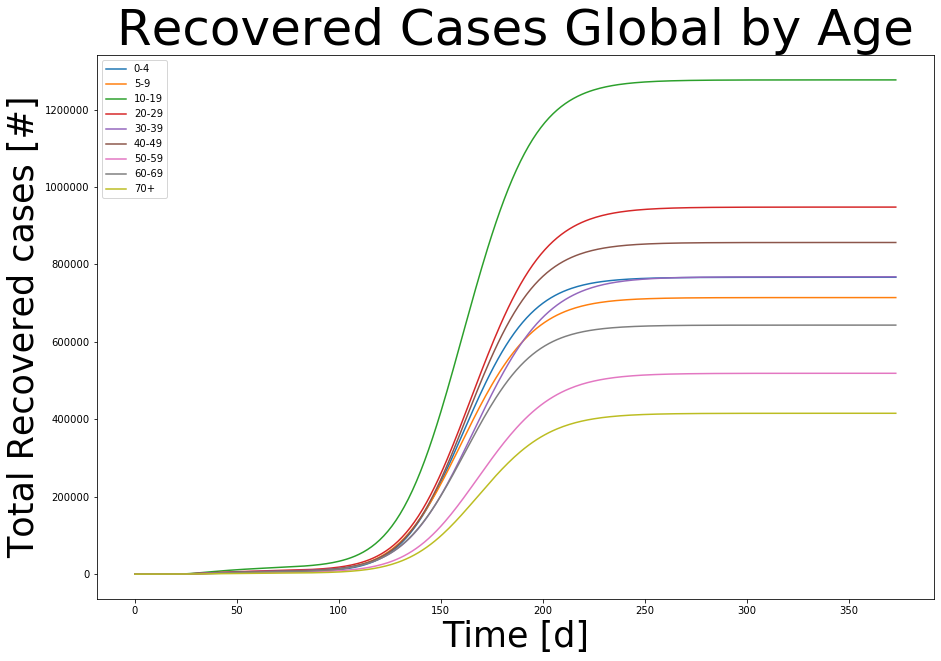

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


ub  parameters, intervention:  20@75_haredim1317_half_jerus  we got:
2020-04-23 00:00:00 Respiratoy cases:  225.9954418046215
2020-05-01 00:00:00 Respiratoy cases:  209.9890134153613
2020-05-09 00:00:00 Respiratoy cases:  198.4213976464255
2020-05-17 00:00:00 Respiratoy cases:  204.17438043654204
2020-05-25 00:00:00 Respiratoy cases:  249.87398451236137
2020-06-02 00:00:00 Respiratoy cases:  351.50761634851307
2020-06-10 00:00:00 Respiratoy cases:  535.0960740604221
2020-06-18 00:00:00 Respiratoy cases:  844.1444432106597
2020-06-26 00:00:00 Respiratoy cases:  1341.289118512411
2020-07-15 00:00:00 Respiratoy cases:  3689.6467884816066
2020-08-01 00:00:00 Respiratoy cases:  7314.087274496597


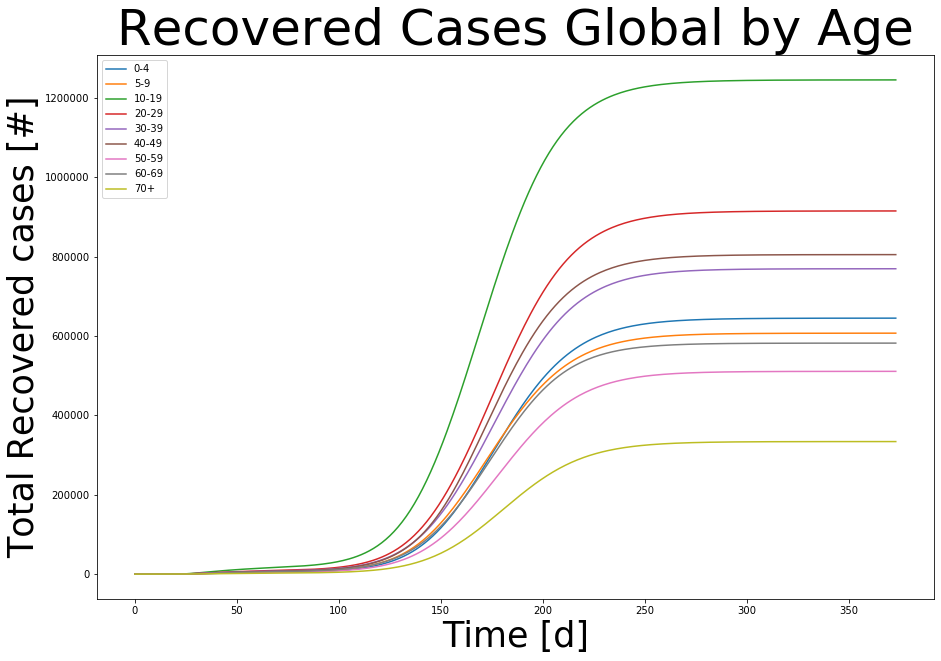

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


base  parameters, intervention:  20@50_no_school_kid010  we got:
2020-04-23 00:00:00 Respiratoy cases:  123.76261460991346
2020-05-01 00:00:00 Respiratoy cases:  112.56876890252823
2020-05-09 00:00:00 Respiratoy cases:  103.78246530521227
2020-05-17 00:00:00 Respiratoy cases:  101.42091564139456
2020-05-25 00:00:00 Respiratoy cases:  111.87319032689116
2020-06-02 00:00:00 Respiratoy cases:  138.9159397854389
2020-06-10 00:00:00 Respiratoy cases:  189.7590047629286
2020-06-18 00:00:00 Respiratoy cases:  276.7338977783969
2020-06-26 00:00:00 Respiratoy cases:  415.1285877996008
2020-07-15 00:00:00 Respiratoy cases:  1025.223188882964
2020-08-01 00:00:00 Respiratoy cases:  2024.8800518408004


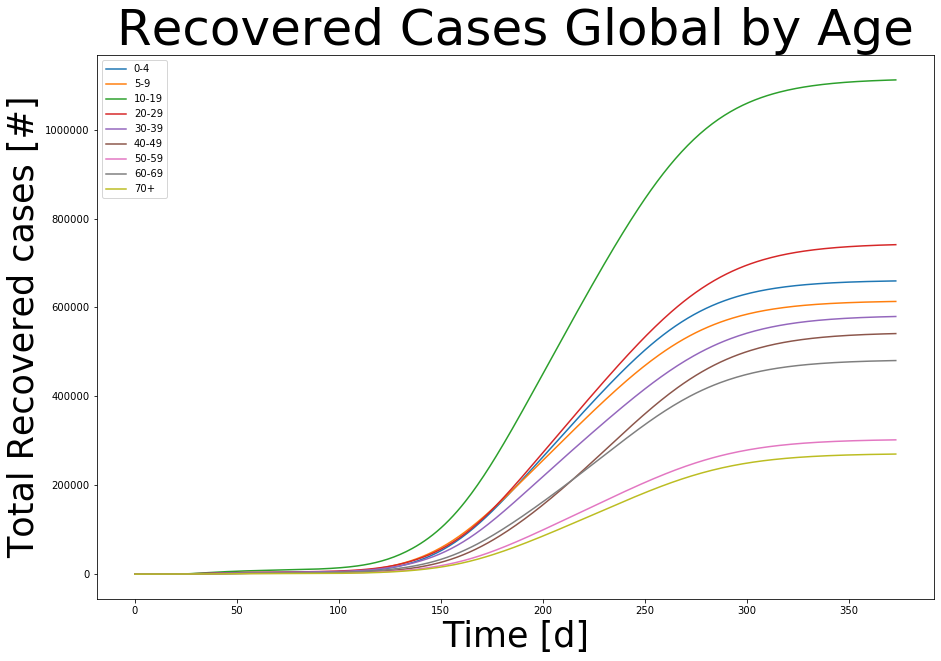

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:82: RuntimeWarning: invalid value encountered in true_divide


base  parameters, intervention:  20@75_haredim1317_half_jerus  we got:
2020-04-23 00:00:00 Respiratoy cases:  123.76261460991346
2020-05-01 00:00:00 Respiratoy cases:  112.56876890252823
2020-05-09 00:00:00 Respiratoy cases:  103.76387228970968
2020-05-17 00:00:00 Respiratoy cases:  99.9515437939478
2020-05-25 00:00:00 Respiratoy cases:  104.57663933079864
2020-06-02 00:00:00 Respiratoy cases:  118.35758774508247
2020-06-10 00:00:00 Respiratoy cases:  142.89810431963497
2020-06-18 00:00:00 Respiratoy cases:  181.72327557143768
2020-06-26 00:00:00 Respiratoy cases:  240.40511623673873
2020-07-15 00:00:00 Respiratoy cases:  503.357507680891
2020-08-01 00:00:00 Respiratoy cases:  933.1385166477922


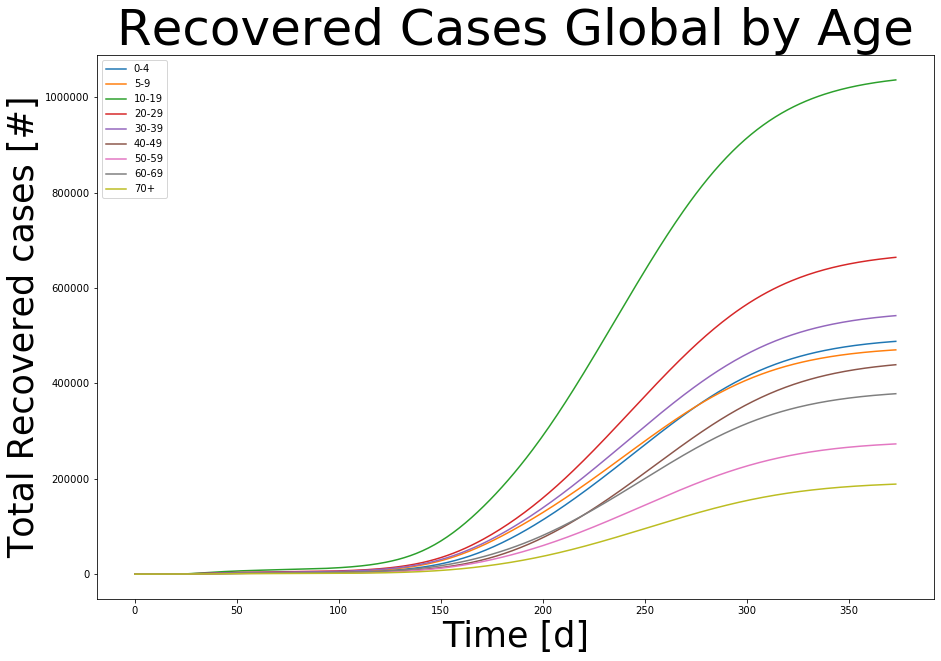

In [10]:
scen = 'Scenario2'
start_inter = pd.Timestamp('2020-05-03')
beginning = pd.Timestamp('2020-02-20')

cal_parameters = pd.read_pickle('../Data/calibration/calibrattion_dict.pickle')
cal_parameters = {key : cal_parameters[key] for key in parameters_list}

for key in cal_parameters.keys():
    model = mdl.Model_behave(
        ind=ind, 
        beta_j=cal_parameters[key]['beta_j'],
        theta=cal_parameters[key]['theta'],
        beta_behave=cal_parameters[key]['beta_behave'],
        eps=mdl.eps_sector[scen],
        f=mdl.f0_full[scen],
    )

    res_mdl = model.predict(
        C=mdl.C_calibration,
        days_in_season=(start_inter-beginning).days,
        stay_home_idx=mdl.stay_home_idx,
        not_routine=mdl.not_routine,
    )
    for inter_name in inter_list:
        # First intervention
        with open('../Data/interventions/C_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
            C_inter = pickle.load(pickle_in)

        with open('../Data/interventions/stay_home_idx_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
            stay_home_idx_inter = pickle.load(pickle_in)

        with open('../Data/interventions/routine_t_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
            routine_t_inter = pickle.load(pickle_in)

        with open('../Data/interventions/transfer_pop_inter_' + inter_name + '.pickle', 'rb') as pickle_in:
            transfer_pop_inter = pickle.load(pickle_in)
            
#         #Seconed intervention 
#         with open('../Data/interventions/C_inter_' + inter_name2 + '.pickle', 'rb') as pickle_in:
#             C_inter2 = pickle.load(pickle_in)

#         with open('../Data/interventions/stay_home_idx_inter_' + inter_name2 + '.pickle', 'rb') as pickle_in:
#             stay_home_idx_inter2 = pickle.load(pickle_in)

#         with open('../Data/interventions/routine_t_inter_' + inter_name2 + '.pickle', 'rb') as pickle_in:
#             routine_t_inter2 = pickle.load(pickle_in)

#         with open('../Data/interventions/transfer_pop_inter_' + inter_name2 + '.pickle', 'rb') as pickle_in:
#             transfer_pop_inter2 = pickle.load(pickle_in)

            
        model_inter = copy.deepcopy(model)
        res_mdl = model_inter.intervention(
            C =C_inter,
            days_in_season=300,
#             days_in_season=(dates[-1]-start_inter).days,
#             days_in_season=inter2_timing - (start_inter-beginning).days,
            stay_home_idx=stay_home_idx_inter,
            not_routine=routine_t_inter,
            prop_dict=transfer_pop_inter,
        )
        
#         model_inter1 = copy.deepcopy(model_inter)
#         model_inter2 = copy.deepcopy(model_inter)
        
#         res_mdl1 = model_inter1.intervention(
#             C=C_inter,
#             days_in_season=30,
#             stay_home_idx=stay_home_idx_inter,
#             not_routine=routine_t_inter,
#             prop_dict=None,
#         )
        
#         res_mdl = model_inter2.intervention(
#             C=C_inter2,
#             days_in_season=(dates[-1]-beginning).days-inter2_timing,
#             stay_home_idx=stay_home_idx_inter2,
#             not_routine=routine_t_inter2,
#             prop_dict=None,
#         )
        for i, vent in enumerate(res_mdl['Vents']):
            res_mdl['Vents'][i] = vent + ((60.0/mdl.pop_israel)*vent)/vent.sum()
        
        print(key, ' parameters, intervention: ', inter_name, ' we got:')
        for date in dates:
            print(date, 'Respiratoy cases: ', (((res_mdl['Vents'])[(date-beginning).days].sum())*mdl.pop_israel))
        
#         print('Recovered cases max: ', (((res_mdl['R'])[:(start_inter-beginning).days+90].sum(axis=1))*9136000).max())
#         print('the model parameters are: ', cal_parameters[key])
#         mdl.plot_I_by_age(model.ind, res_mdl)
        mdl.plot_R_by_age(ind, res_mdl)
#         mdl.plot_respiration_cases(res_mdl, (start_inter-beginning).days)
#         mdl.plot_hospitalization_cases(res_mdl)
#         mdl.make_respiratory_warning(res_mdl, (start_inter-beginning).days)
        
        
#         results[1] = res_mdl1
#         results[2] = res_mdl2
#         results[(inter_name+'inter2', key)] = res_mdl
        
# try:
#     os.mkdir('../Data/results')
# except:
#     pass
# with open('../Data/results/28_4_20_20_36.pickle', 'wb') as handle:
#     pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [3]:
# interventions to examine:
# inter = '20@50_no_school_kid010'
inter = '20@75_no_school_kid010'
# inter = '20@100_no_school_kid010'
# inter = '20@100'

# parameters to examine:
# parameters = '70%'
# parameters = '75%'
# parameters = '80%'
parameters = 'ub'
# parameters = 'base'
# parameters = 'lb'

closed_inter = '20@10'
scen = 'Scenario2'
start_inter = pd.Timestamp('2020-05-03')
beginning = pd.Timestamp('2020-02-20')

cal_parameters = pd.read_pickle('../Data/calibration/calibrattion_dict.pickle')
cal_parameters = cal_parameters[parameters]

model = mdl.Model_behave(
    ind=ind, 
    beta_j=cal_parameters['beta_j'],
    theta=cal_parameters['theta'],
    beta_behave=cal_parameters['beta_behave'],
    eps=mdl.eps_sector[scen],
    f=mdl.f0_full[scen],
)

res_mdl = model.predict(
    C=mdl.C_calibration,
    days_in_season=(start_inter-beginning).days,
    stay_home_idx=mdl.stay_home_idx,
    not_routine=mdl.not_routine,
)

(res, res_stop, stop_time) = \
    mdl.automatic_global_inter(model, mdl.pop_israel, inter, closed_inter, sim_length=100)

#         print('Recovered cases max: ', (((res_mdl['R'])[:(start_inter-beginning).days+90].sum(axis=1))*9136000).max())
#         print('the model parameters are: ', cal_parameters[key])
#         mdl.plot_I_by_age(model.ind, res_mdl)
#         mdl.plot_R_by_age(res_mdl)
#         mdl.plot_respiration_cases(res_mdl, (start_inter-beginning).days)
#         mdl.plot_hospitalization_cases(res_mdl)
#         mdl.make_respiratory_warning(res_mdl, (start_inter-beginning).days)


..\SEIR_full\utils.py:442: RuntimeWarning: invalid value encountered in true_divide
  (60.0 / is_pop) * vent) / vent.sum()
..\SEIR_full\utils.py:445: RuntimeWarning: invalid value encountered in true_divide
  (60.0 / is_pop) * vent) / vent.sum()


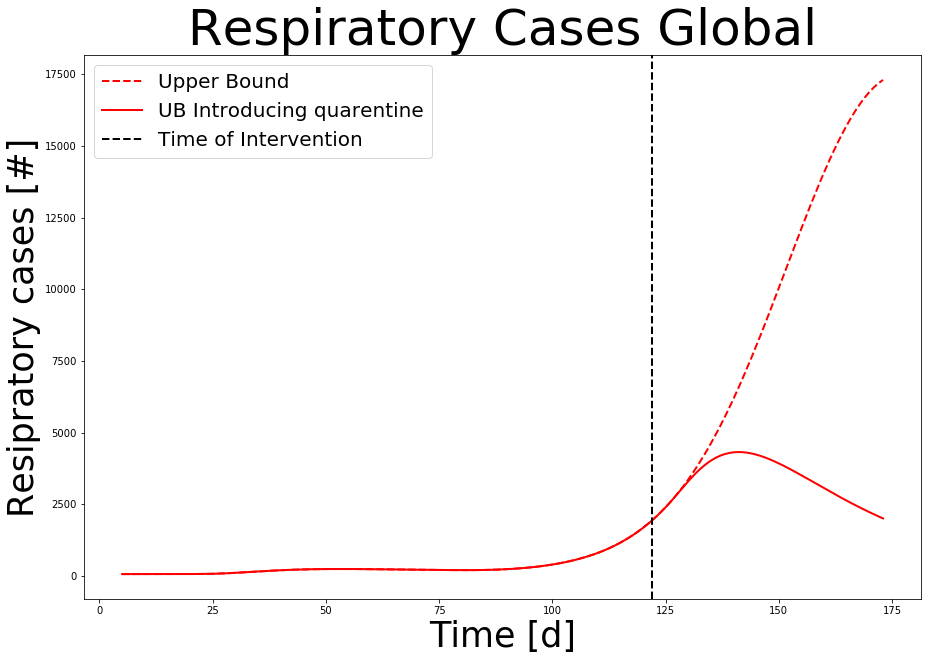

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot((((res['Vents']).sum(axis=1))*mdl.pop_israel), linewidth=2, c='r', linestyle='--')
ax.plot((((res_stop['Vents']).sum(axis=1))*mdl.pop_israel), linewidth=2, c='r')
ax.axvline(x=stop_time+(start_inter-beginning).days, c='k',linewidth=2, linestyle='--')
ax.set_ylabel('Resipratory cases [#]', fontsize=35)
ax.set_title('Respiratory Cases Global', fontsize=50)
ax.set_xlabel('Time [d]', fontsize=35)
ax.legend(['Upper Bound', 'UB Introducing quarentine', 'Time of Intervention'], fontsize=20)
plt.show()


# mdl.plot_respiration_cases(results[2])

In [9]:
(results[('20@75_noschool_kid010', 'ub')]['Vents'].sum(axis=1)*mdl.pop_israel < 4870).sum()
(results[('20@75_noschool_kid010', 'ub')]['Vents'].sum(axis=1)*mdl.pop_israel)[140]

NameError: name 'results' is not defined

In [68]:
results.keys()

dict_keys([('20@75_noschool_kid010', 'ub'), ('20@75_noschool_kid010', 'base'), ('20@75_noschool_kid010inter2', 'ub')])

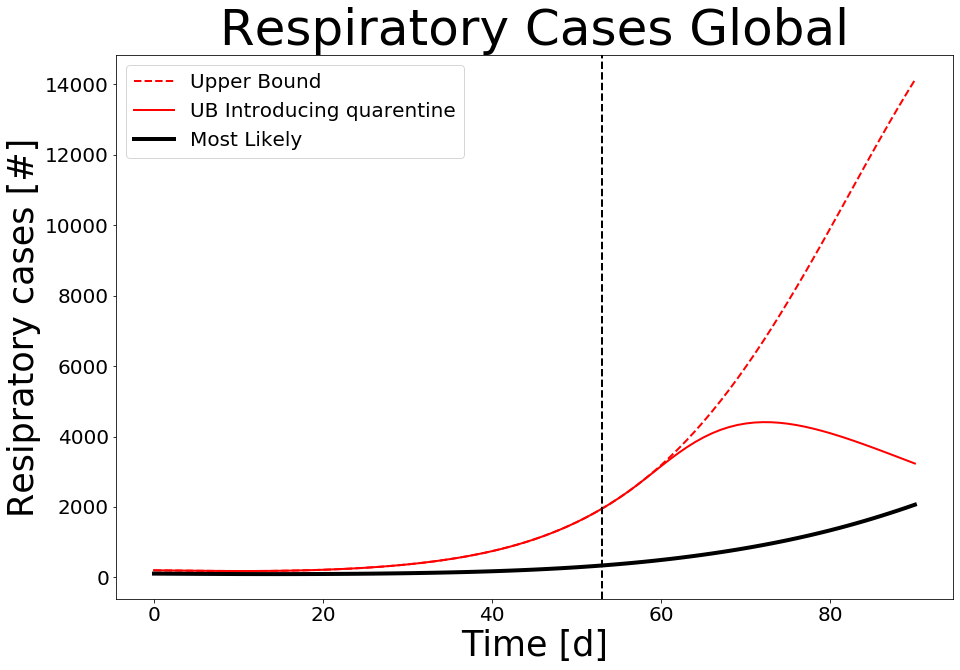

In [81]:
fig, ax = plt.subplots(figsize=(15, 10))
start_x = (start_inter-beginning).days
ax.plot((((results[('20@75_noschool_kid010', 'ub')]['Vents']).sum(axis=1))*mdl.pop_israel)[start_x:], linewidth=2, c='r', linestyle='--')
ax.plot((((results[('20@75_noschool_kid010inter2', 'ub')]['Vents']).sum(axis=1))*mdl.pop_israel)[start_x:], linewidth=2, c='r')
ax.plot((((results[('20@75_noschool_kid010', 'base')]['Vents']).sum(axis=1))*mdl.pop_israel)[start_x:], linewidth=4, c='k')
ax.axvline(x=inter2_timing - (start_inter-beginning).days, c='k',linewidth=2, linestyle='--')
ax.set_ylabel('Resipratory cases [#]', fontsize=35)
ax.set_title('Respiratory Cases Global', fontsize=50)
ax.set_xlabel('Time [d]', fontsize=35)
ax.legend(['Upper Bound', 'UB Introducing quarentine', 'Most Likely'], fontsize=20)
plt.show()


# mdl.plot_respiration_cases(results[2])

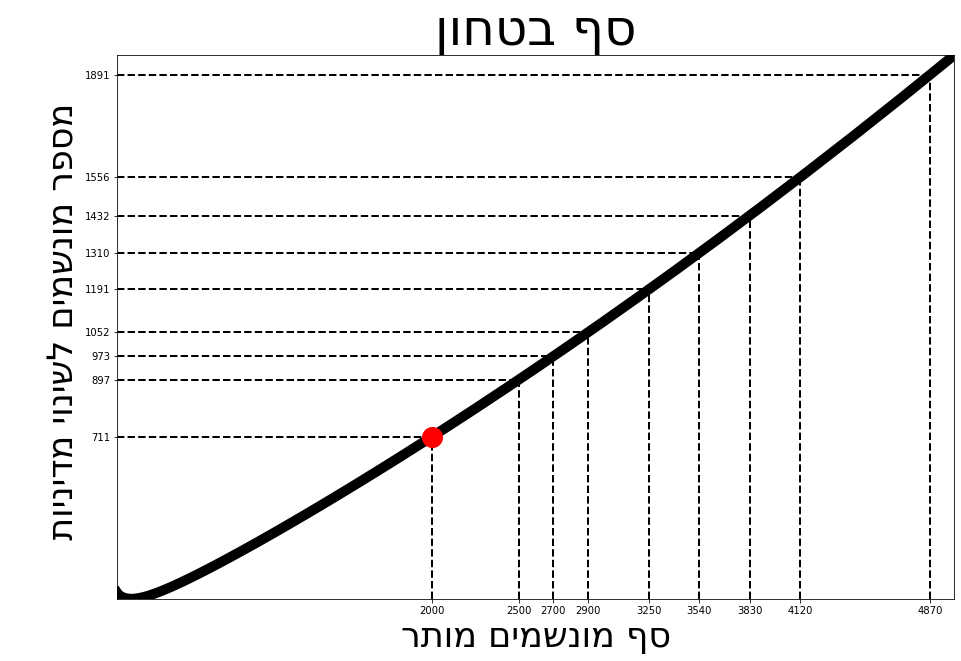

In [80]:
mdl.make_respiratory_warning(results[('20@75_noschool_kid010', 'ub')], (start_inter-beginning).days)

In [60]:
(sum(mdl.shrink_array_sum(mdl.risk_age_dict, res_mdl['S'][0])[-2:])+sum(mdl.shrink_array_sum(mdl.risk_age_dict, res_mdl['S'][0])[0:9]))*0.15

0.04192159321739942

In [44]:
sum(mdl.shrink_array_sum(mdl.risk_age_dict, res_mdl['S'][0])[5])

0.19461988540278613

In [45]:
sum(mdl.shrink_array_sum(mdl.risk_age_dict, res_mdl['S'][0])[-2:])

0.08485740271320999

In [61]:
sum(mdl.shrink_array_sum(mdl.risk_age_dict, res_mdl['S'][0])[9:-2])*0.1

0.0720522711884004

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


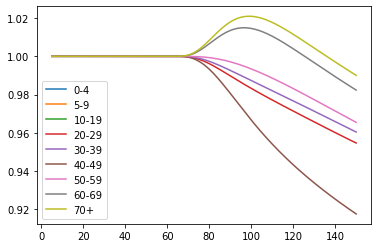

In [7]:
R_per_age = {}
for age in mdl.A.values():
    R_per_age[age] = (results[('50_60+risk30_no_school_kid06_inter', '80%')]['Vents'][:, mdl.age_dict[age]].sum(axis=1)*mdl.pop_israel) /\
                     (results[('60_no_60+risk_no_school_kid06_inter', '80%')]['Vents'][:, mdl.age_dict[age]].sum(axis=1)*mdl.pop_israel)
plot_df = pd.DataFrame.from_dict(R_per_age)

# plot
plot_df.plot()

In [24]:
(results[('50_60+risk30_no_school_kid06_inter', 'ub')]['R'][-1, :].sum()*mdl.pop_israel)# -\
# (results[('60_no_60+risk_no_school_kid06_inter', 'ub')]['R'][-1, :].sum()*mdl.pop_israel)

337337.11884314124